# Package location DoE analysis
*Author: Leo Guo, latest update: December 2023*

The goal of this analysis is to show whether the DoE is sufficiently populated. If so, this yields a credible basis for performing Bayesian optimization.

This analysis consists of two parts: 
1. Sensitivity analysis (index convergence)
2. Regression analysis ($R^2$ convergence)

## 0. Setting up

Make sure to have a Python (3.7+) environment ready. Install (`pip`) and import the following packages:

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import f3dasm
import gpytorch
import torch
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import SALib
import seaborn as sns

2024-07-15 14:36:43,416 - Imported f3dasm (version: 1.2.0)


Setting a manual RNG seed for reproducibility.

In [2]:
np.random.seed(123)

The next package is not part of the Python Package Index. If the regression analysis is not run, there is no need to import it.

To access the regression analysis, please set `generate_r2` to `True` and visit https://github.com/llguo95/MFB for the installation instructions.

In [3]:
generate_r2 = True
if generate_r2:
    import mfb

Indicate the paths to the data sets:

In [4]:
df_raw = pd.read_csv("data/raw/doe_data_4D.csv", header=[0, 1], index_col=0)

Let's look at the data set.

In [9]:
df_raw

input                                    output
            ddx         ddy      CTE1      CTE2  acc_nlcr
0    132.251602  119.392754  0.000006  0.000028  0.002467
1     56.006027   45.001034  0.000012  0.000037  0.000642
2     52.127804   85.608894  0.000007  0.000032  0.002428
3    144.606888   81.950958  0.000012  0.000024  0.000611
4     97.715698  135.190979  0.000008  0.000035  0.001281
..          ...         ...       ...       ...       ...
469   16.876066   45.764404  0.000012  0.000027  0.000693
470   33.761417  142.506119  0.000009  0.000024  0.001407
471   89.567551   21.147608  0.000007  0.000034  0.001670
472  120.141060   93.884422  0.000011  0.000022  0.000721
473   76.526901   74.652023  0.000006  0.000030  0.003028

[474 rows x 5 columns]

Let's clean up the `NaN` values.

In [10]:
df = df_raw.dropna().reset_index(drop=True)

In [11]:
df

input                                    output
            ddx         ddy      CTE1      CTE2  acc_nlcr
0    132.251602  119.392754  0.000006  0.000028  0.002467
1     56.006027   45.001034  0.000012  0.000037  0.000642
2     52.127804   85.608894  0.000007  0.000032  0.002428
3    144.606888   81.950958  0.000012  0.000024  0.000611
4     97.715698  135.190979  0.000008  0.000035  0.001281
..          ...         ...       ...       ...       ...
462   16.876066   45.764404  0.000012  0.000027  0.000693
463   33.761417  142.506119  0.000009  0.000024  0.001407
464   89.567551   21.147608  0.000007  0.000034  0.001670
465  120.141060   93.884422  0.000011  0.000022  0.000721
466   76.526901   74.652023  0.000006  0.000030  0.003028

[467 rows x 5 columns]

Next, we look at a pairwise scatter plot to see the direct correlations between any two variables.

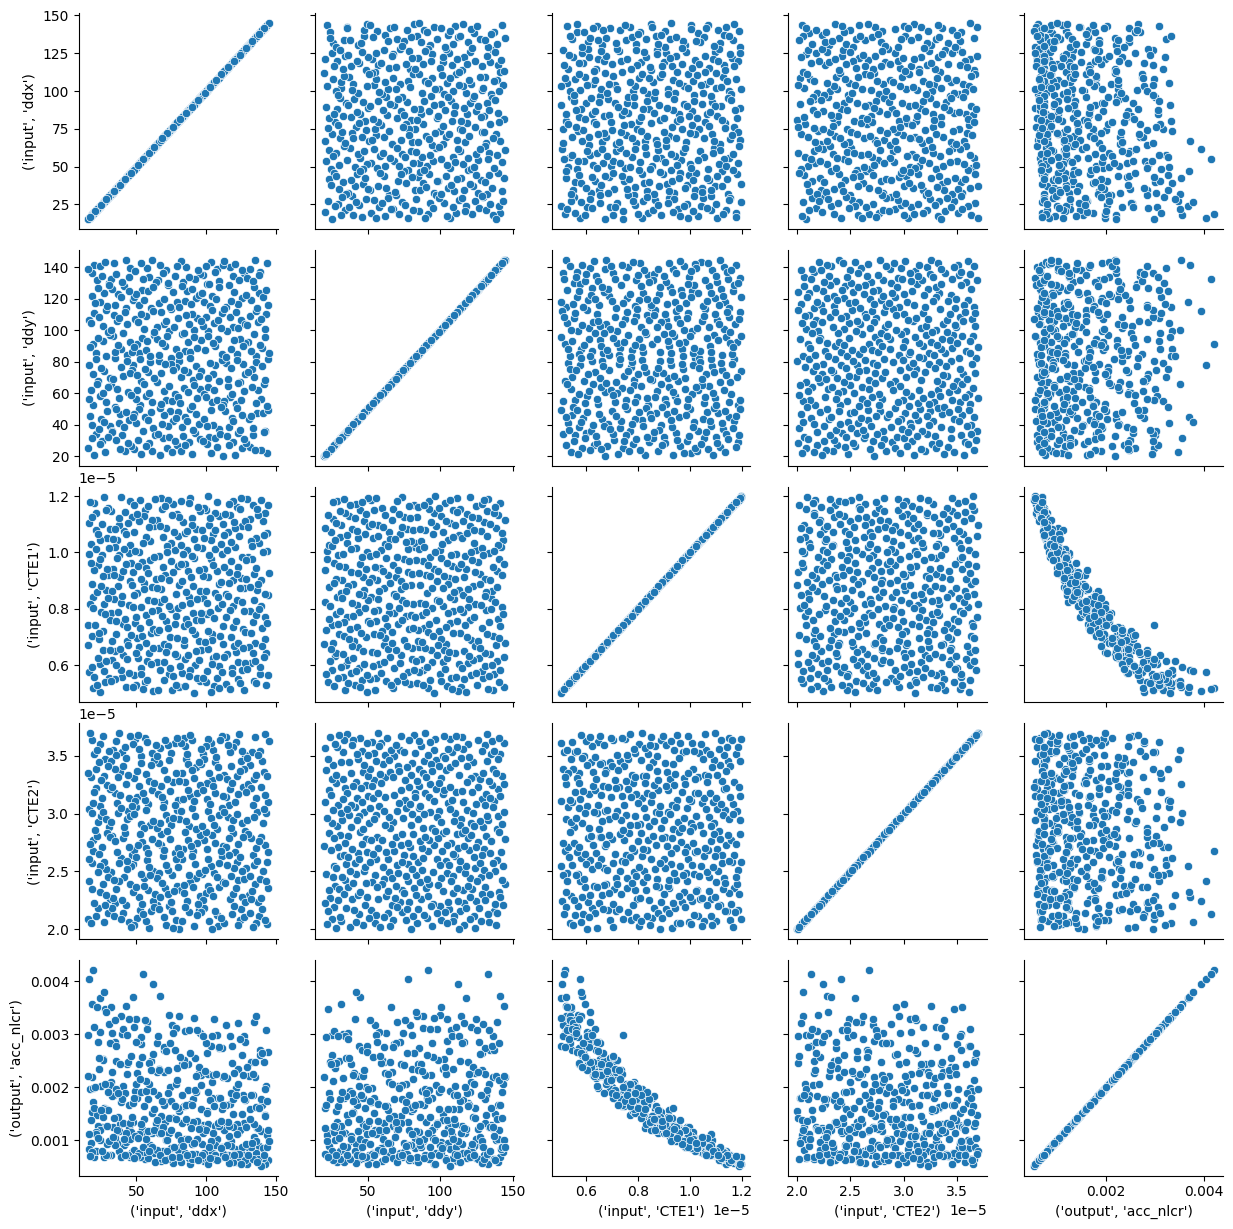

In [13]:
# g = sns.PairGrid(df[df.input.rrotz==0].drop(columns=('input', 'rrotz')))
g = sns.PairGrid(df)
g.map(sns.scatterplot)